In [55]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [56]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [57]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [58]:
X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [59]:
def plotSample(index):
    plt.figure(figsize = (5, 1))
    plt.imshow(X_train[index])    

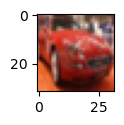

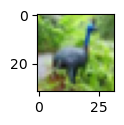

In [60]:
plotSample(5)
plotSample(6)

In [61]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

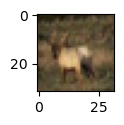

In [62]:
plotSample(3)

In [63]:
classes[y_train[3][0]], classes[y_train[4][0]]

('deer', 'automobile')

In [64]:
# RGB - Range 0 - 255 -- scale them
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [65]:
X_train_scaled.shape

(50000, 32, 32, 3)

In [66]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [67]:
# OneHotEncoding
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes = 10, dtype = "float32"
)
y_train_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [68]:
X_train_scaled.shape

(50000, 32, 32, 3)

In [ ]:
def getmodel():
    model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32, 32, 3)),
    keras.layers.Dense(3000, activation = "relu"),
    keras.layers.Dense(1000, activation = "relu"),
    keras.layers.Dense(10, activation = "sigmoid")
    ])
    model.compile(
    optimizer = "SGD", 
    loss = "categorical_crossentropy",
    metrics = ["accuracy"])
    model.fit(X_train_scaled, y_train_categorical, epochs = 50)
    return model

Epoch 1/50
1563/1563 [==============================] - 136s 87ms/step - loss: 1.8162 - accuracy: 0.3528
Epoch 2/50
1563/1563 [==============================] - 132s 85ms/step - loss: 1.6241 - accuracy: 0.4275
Epoch 3/50
1563/1563 [==============================] - 138s 89ms/step - loss: 1.5454 - accuracy: 0.4547
Epoch 4/50
1563/1563 [==============================] - 133s 85ms/step - loss: 1.4833 - accuracy: 0.4763
Epoch 5/50
1152/1563 [=====================>........] - ETA: 35s - loss: 1.4437 - accuracy: 0.4915

In [ ]:
classes[np.argmax(model.predict(X_test_scaled)[0])]

In [ ]:
y_test[0]

In [ ]:
classes[y_test[0][0]]

In [ ]:
model.evaluate(X_test_scaled, y_test_categorical)

In [ ]:
%%timeit -n1 - r1
with tf.device("/CPU:0"):
    cpu_model = get_model()
    model.fit(X_train_scaled, y_train_categorical)

In [ ]:
%%timeit -n1 -r1
with tf.device("/GPU:0"):
    gpu_model = get_model
    gpu_model.fit(X_train_scaled, y_train_categorical)